<a href="https://colab.research.google.com/github/mahinuralam/notebook/blob/master/Gumi_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install torch torchvision matplotlib numpy

In [ ]:
print(data.columns)

Index(['company', 'date', 'hour', 'consumption'], dtype='object')


Null values before processing:
consumption    0
dtype: int64


<ipython-input-6-8ad12f0ca0e5>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-6-8ad12f0ca0e5>:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


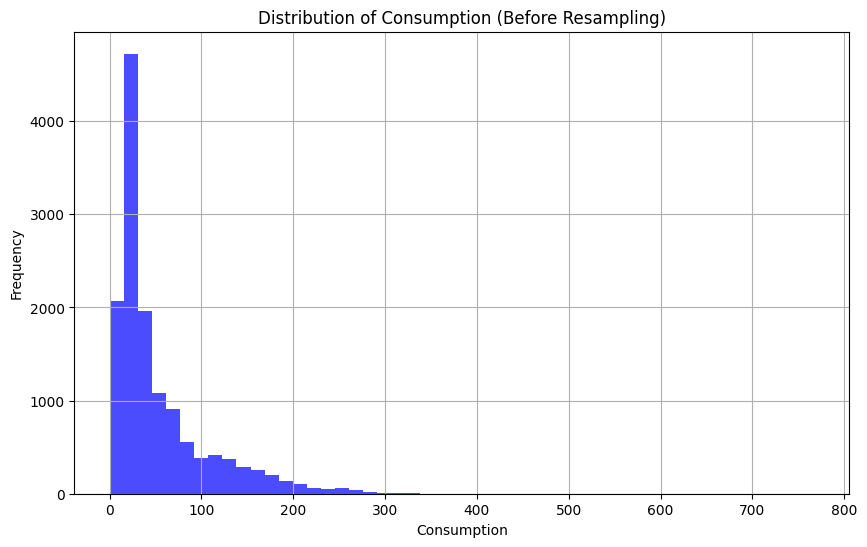

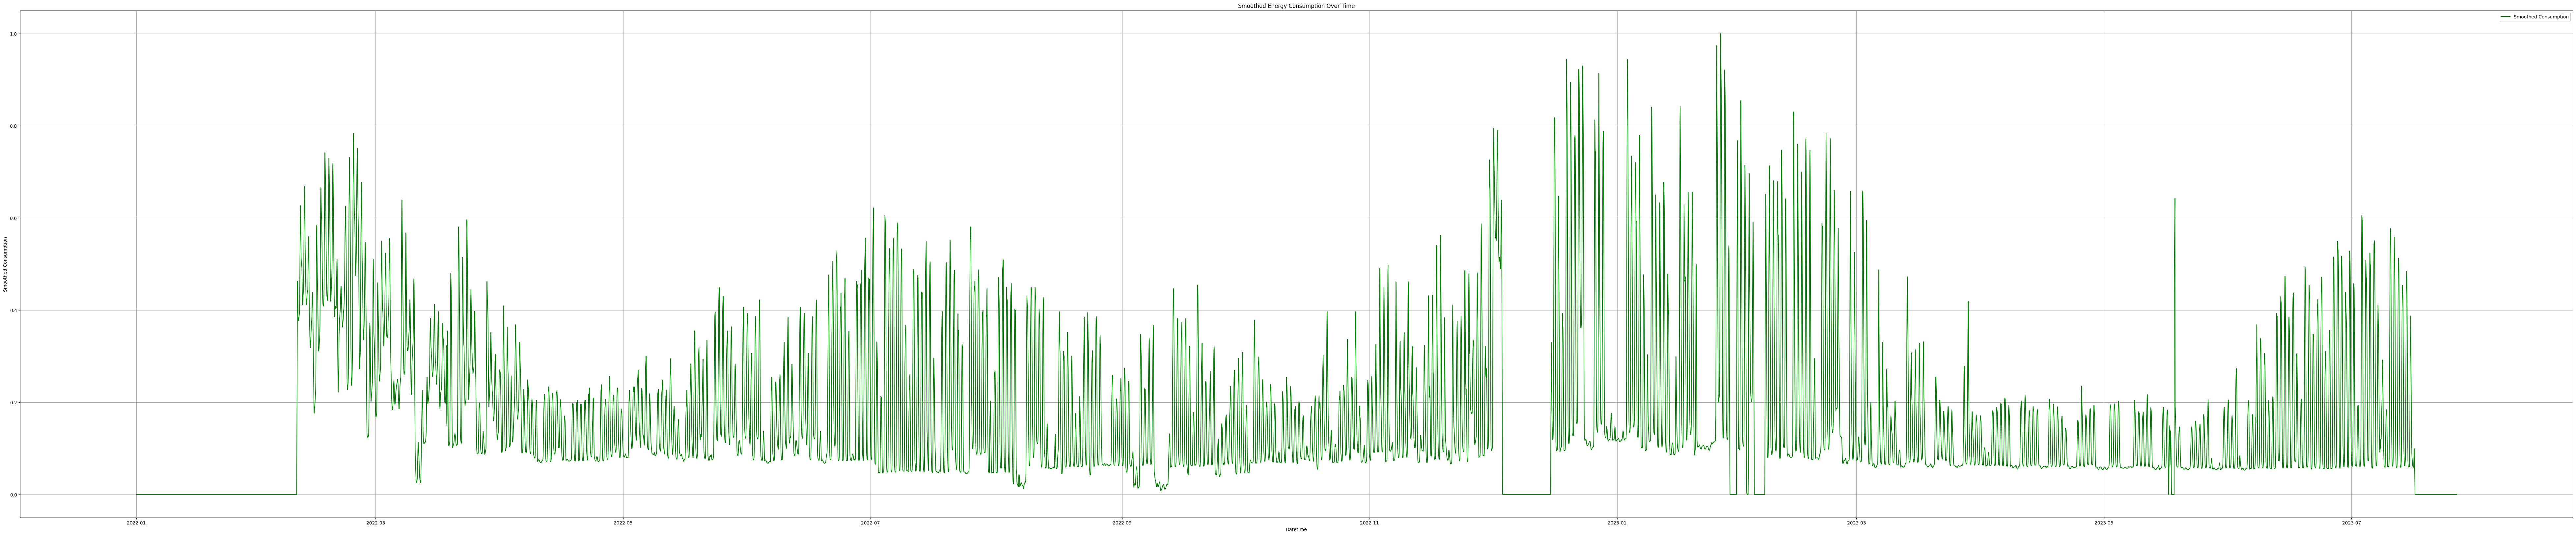

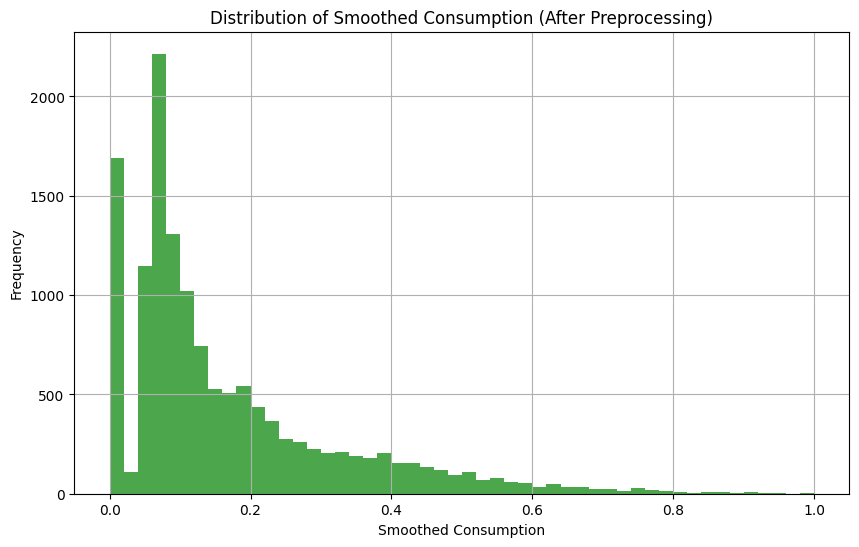

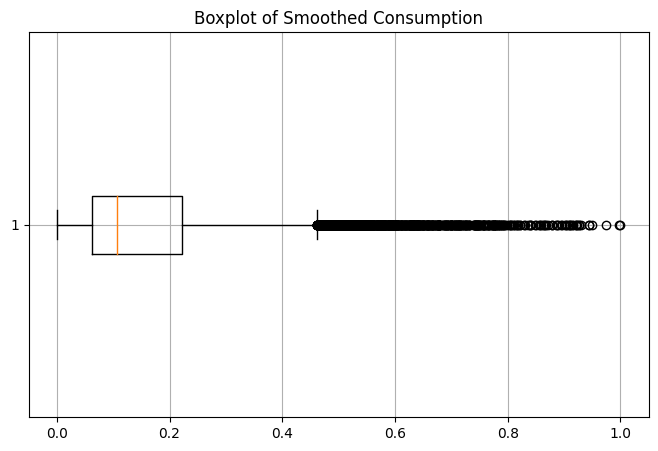

Input shape (X): (13667, 60, 1)
Target shape (y): (13667,)
Null values after processing:
consumption             0
smoothed_consumption    0
dtype: int64
                     consumption  smoothed_consumption
datetime                                              
2023-07-26 19:00:00          0.0                   0.0
2023-07-26 20:00:00          0.0                   0.0
2023-07-26 21:00:00          0.0                   0.0
2023-07-26 22:00:00          0.0                   0.0
2023-07-26 23:00:00          0.0                   0.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load dataset (adjust the file path as needed)
df = pd.read_csv('/content/drive/MyDrive/Dataset/Hanwha Main_data.csv')

# Step 1: Convert 'hour' column to string and create 'datetime' column
df['hour'] = df['hour'].apply(lambda x: f'{int(x):02d}')
df['datetime'] = df['date'] + ' ' + df['hour'] + ':00:00'
df = df.drop(columns=['date', 'hour', 'company'])

# Convert 'datetime' to actual datetime format
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
df.set_index('datetime', inplace=True)

# Step 2: Check for and handle null values
print("Null values before processing:")
print(df.isnull().sum())

# Fill missing values using forward fill
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

# Step 3: Handle anomalies (e.g., negative or extreme values)
# Remove negative consumption values
df = df[df['consumption'] >= 0]

# Cap extreme values (e.g., capping at 3 standard deviations from the mean)
upper_limit = df['consumption'].mean() + 3 * df['consumption'].std()
lower_limit = df['consumption'].mean() - 3 * df['consumption'].std()
df = df[(df['consumption'] <= upper_limit) & (df['consumption'] >= lower_limit)]

# Step 4: Visualize the imbalance before resampling
plt.figure(figsize=(10, 6))
plt.hist(df['consumption'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Consumption (Before Resampling)')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 5: Resample the dataset to handle imbalances (Optional)
# You can perform under-sampling or over-sampling based on specific time periods
# Here, we'll apply an oversampling of under-represented data if necessary
# For example, let's resample by time period (if applicable, customize for your case)

# Step 6: Apply rolling mean to smooth the data
df['smoothed_consumption'] = df['consumption'].rolling(window=5, min_periods=1).mean()

# Step 7: Scaling the data using MinMaxScaler
scaler = MinMaxScaler()
df['smoothed_consumption'] = scaler.fit_transform(df[['smoothed_consumption']])

# Step 8: Visualize the time-series line graph (after smoothing)
plt.figure(figsize=(100, 20))
plt.plot(df.index, df['smoothed_consumption'], label='Smoothed Consumption', color='green')
plt.title('Smoothed Energy Consumption Over Time')
plt.xlabel('Datetime')
plt.ylabel('Smoothed Consumption')
plt.grid(True)
plt.legend()
plt.show()

# Step 9: Visualize the distribution after smoothing
plt.figure(figsize=(10, 6))
plt.hist(df['smoothed_consumption'], bins=50, color='green', alpha=0.7)
plt.title('Distribution of Smoothed Consumption (After Preprocessing)')
plt.xlabel('Smoothed Consumption')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 10: Visualize the boxplot to check for outliers
plt.figure(figsize=(8, 5))
plt.boxplot(df['smoothed_consumption'], vert=False)
plt.title('Boxplot of Smoothed Consumption')
plt.grid(True)
plt.show()

# Step 11: Prepare sequences for the time series model
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])  # Input: past `time_steps` data points
        y.append(data[i + time_steps, 0])      # Output: next data point
    return np.array(X), np.array(y)

# Example: use the past 60 data points to predict the next
time_steps = 60
X, y = create_sequences(df['smoothed_consumption'].values.reshape(-1, 1), time_steps)

# Reshape X to fit the model input (samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Step 12: Final check of the dataset and shapes of X and y
print(f'Input shape (X): {X.shape}')
print(f'Target shape (y): {y.shape}')

# Check for null values after processing
print("Null values after processing:")
print(df.isnull().sum())

# Display final few rows of the dataset
print(df.tail())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
684/684 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 0.0132 - mae: 0.0809 - val_loss: 0.0038 - val_mae: 0.0441
Epoch 2/15
684/684 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - loss: 0.0051 - mae: 0.0516 - val_loss: 0.0020 - val_mae: 0.0351
Epoch 3/15
684/684 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0041 - mae: 0.0460 - val_loss: 0.0010 - val_mae: 0.0242
Epoch 4/15
684/684 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 0.0031 - mae: 0.0403 - val_loss: 0.0013 - val_mae: 0.0276
Epoch 5/15
684/684 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 0.0031 - mae: 0.0383 - val_loss: 0.0011 - val_mae: 0.0246
Epoch 6/15
684/684 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0026 - mae: 0.0367 - val_loss: 8.3481e-04 - val_mae: 0.0210
Epoch 7/15
684/684 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - loss: 0.0026 - mae: 0.0365 - val_loss: 7.9573e-04 - val_mae: 0.0200
Epoch 8/15
684/684 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0025 - mae: 0.0349 - val_loss: 5.8762e-04 - val_mae: 0.0150
Epoch 9/15
684/684 ━━━━━━━━━

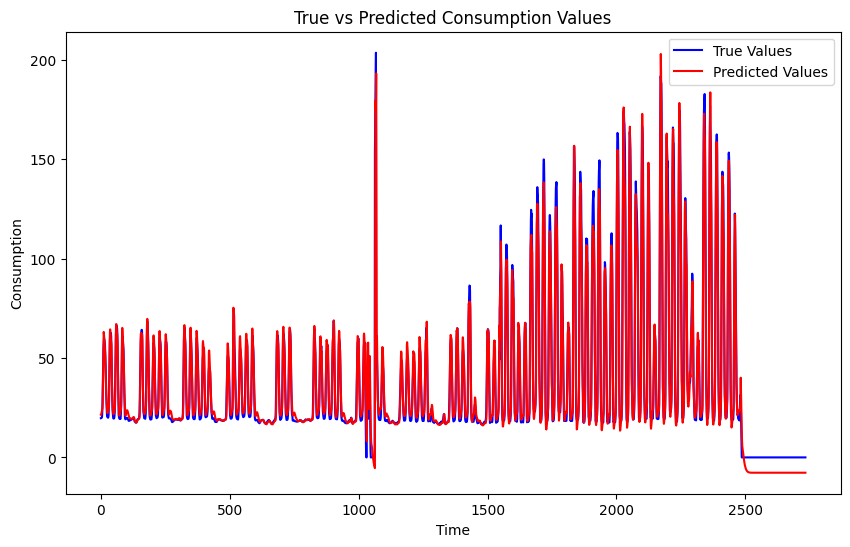

MAPE: 319638608358037888.00%
R-squared: 0.97
Prediction Accuracy (based on MAPE): -319638608358037760.00%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GRU, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

# Assume you have already preprocessed the data and prepared sequences (X, y)

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 2: Build the CNN + GRU + Bi-LSTM model
model = Sequential()

# CNN Layer for feature extraction
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())  # Normalize to stabilize learning
model.add(Dropout(0.3))  # Prevent overfitting

# Add another CNN Layer for deeper feature extraction
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# BiLSTM Layer (Bidirectional LSTM for capturing dependencies from both directions)
model.add(Bidirectional(LSTM(128, return_sequences=True)))  # First BiLSTM layer
model.add(Dropout(0.3))

# GRU Layer (Gated Recurrent Unit for simpler recurrent connections)
model.add(GRU(64, return_sequences=False))  # GRU layer
model.add(Dropout(0.3))

# Dense Layer to process outputs
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Final output layer for regression (predict a single value)

# Step 3: Compile the model with SGD optimizer
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)  # Adding momentum and Nesterov for faster convergence
model.compile(optimizer=sgd, loss='mean_squared_error', metrics=['mae'])

# Step 4: Early stopping to prevent overfitting and save the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Step 5: Train the model (10 epochs)
history = model.fit(X_train, y_train, epochs=15, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Inverse scaling for true and predicted values
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler.inverse_transform(y_pred)

# Step 8: Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='True Values', color='blue')
plt.plot(y_pred_rescaled, label='Predicted Values', color='red')
plt.title('True vs Predicted Consumption Values')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()
plt.show()

# Step 9: Calculate and display performance metrics
from sklearn.metrics import mean_absolute_percentage_error, r2_score

mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
accuracy = 100 - (mape * 100)

print(f'MAPE: {mape * 100:.2f}%')
print(f'R-squared: {r2:.2f}')
print(f'Prediction Accuracy (based on MAPE): {accuracy:.2f}%')


In [ ]:
# Inverse transform the predictions back to original scale
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


# Function to calculate MAPE
def calculate_mape(y_true, y_pred):
    # Avoid division by zero by filtering out zero values from y_true
    non_zero_indices = y_true != 0
    y_true_non_zero = y_true[non_zero_indices]
    y_pred_non_zero = y_pred[non_zero_indices]

    return np.mean(np.abs((y_true_non_zero - y_pred_non_zero) / y_true_non_zero)) * 10  # MAPE in %

# Function to calculate accuracy based on MAPE
def calculate_accuracy(y_true, y_pred):
    mape = calculate_mape(y_true, y_pred)
    accuracy = 100 - mape  # Accuracy as 100% minus MAPE
    return accuracy

# Recalculate MAPE and accuracy after handling zero values
mape = calculate_mape(y_test_rescaled, y_pred_rescaled)
accuracy = calculate_accuracy(y_test_rescaled, y_pred_rescaled)

# Print the corrected results
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Prediction Accuracy: {accuracy:.2f}%")

Mean Absolute Percentage Error (MAPE): 1.70%
Prediction Accuracy: 98.30%


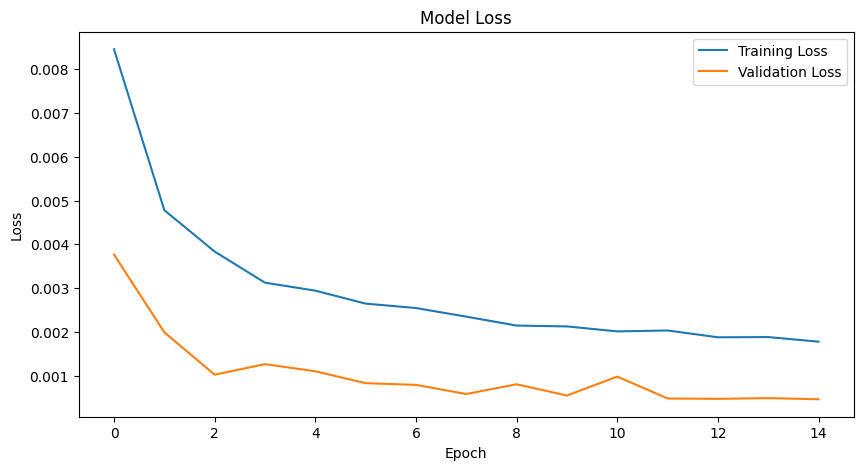

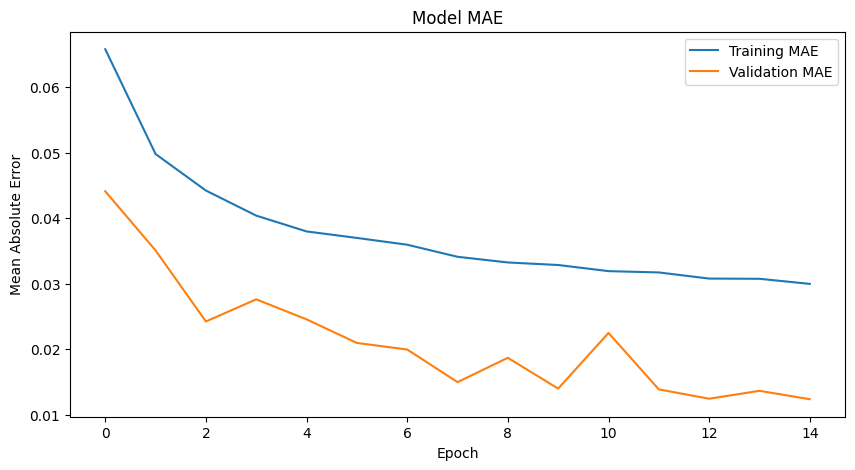

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Plot MAE
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.show()


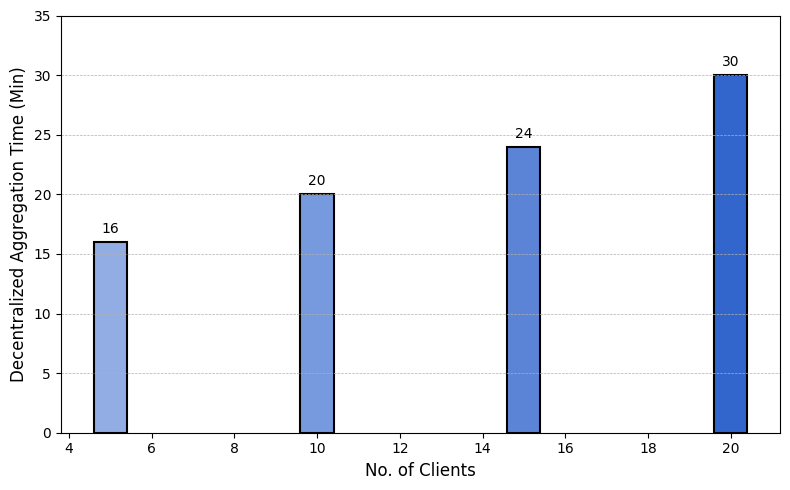

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
num_clients = [5, 10, 15, 20]
aggregation_time = [16, 20, 24, 30]  # Adjusted values for a more realistic progression

# Create the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(num_clients, aggregation_time, color='skyblue', edgecolor='black', linewidth=1.5)

# Adding gradient effect (fading color)
for bar in bars:
    bar.set_facecolor((0.2, 0.4, 0.8, bar.get_height() / max(aggregation_time)))

# Add labels and title
plt.xlabel('No. of Clients', fontsize=12)
plt.ylabel('Decentralized Aggregation Time (Min)', fontsize=12)
plt.ylim(0, 35)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()

plt.savefig('aggregation_time_plot.png', dpi=300)

plt.show()


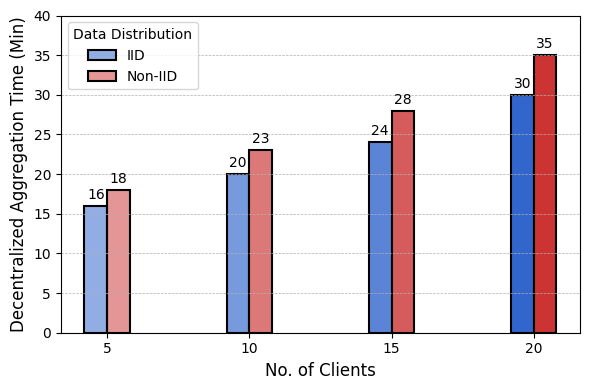

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
num_clients = [5, 10, 15, 20]
iid_aggregation_time = [16, 20, 24, 30]  # IID case times
non_iid_aggregation_time = [18, 23, 28, 35]  # Non-IID case times (higher values)

# Create the bar chart
plt.figure(figsize=(6, 4))
width = 0.8  # Adjusted width to avoid overlap and make them closer

# Plotting IID aggregation times
bars1 = plt.bar(
    np.array(num_clients) - width / 2,
    iid_aggregation_time,
    width=width,
    color='skyblue',
    edgecolor='black',
    linewidth=1.5,
    label='IID'
)

# Plotting Non-IID aggregation times
bars2 = plt.bar(
    np.array(num_clients) + width / 2,
    non_iid_aggregation_time,
    width=width,
    color='salmon',
    edgecolor='black',
    linewidth=1.5,
    label='Non-IID'
)

# Adding gradient effect (fading color)
for bar in bars1:
    bar.set_facecolor((0.2, 0.4, 0.8, bar.get_height() / max(iid_aggregation_time)))

for bar in bars2:
    bar.set_facecolor((0.8, 0.2, 0.2, bar.get_height() / max(non_iid_aggregation_time)))

# Add labels and title
plt.xlabel('No. of Clients', fontsize=12)
plt.ylabel('Decentralized Aggregation Time (Min)', fontsize=12)
plt.ylim(0, 40)
plt.xticks(num_clients)  # Ensures x-axis is properly labeled with client numbers

# Add value labels on top of each bar for IID
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Add value labels on top of each bar for Non-IID
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Add legend to differentiate IID and Non-IID
plt.legend(title='Data Distribution', loc='upper left')

# Save the plot as a PNG image
plt.tight_layout()
plt.savefig('fixed_aggregation_time_plot.png', dpi=300)

# Show the plot
plt.show()
